In [1]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [6]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [8]:
target = "default"
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1234)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est",linear_model.LogisticRegression(solver = "liblinear"))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


In [9]:
pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

,actual,prediction
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


In [10]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[182,  24],
       [ 51,  43]])

In [11]:
(182+43)/len(y_test)

0.75

In [15]:
print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("training precison:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("training recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))

training accuracy: 0.7842857142857143
test accuracy: 0.75
training precison: 0.6751592356687898
test precision: 0.6417910447761194
training recall: 0.5145631067961165
test recall: 0.4574468085106383


In [16]:
43/(43+24)

0.6417910447761194

In [17]:
43/(43+51)

0.4574468085106383

In [29]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]

y_test_pred = np.where(y_test_prob>0.5, 1, 0)

print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("training precison:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("training recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))

training accuracy: 0.7842857142857143
test accuracy: 0.75
training precison: 0.6751592356687898
test precision: 0.6417910447761194
training recall: 0.5145631067961165
test recall: 0.4574468085106383


In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

Text(0, 0.5, 'TPR')

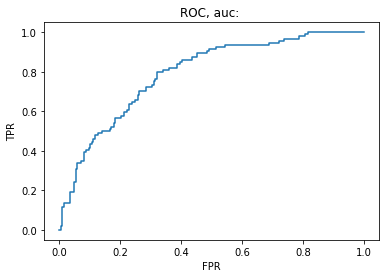

In [35]:
plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc: " % auc)
plt.xlabel("FPR")
plt.ylabel("TPR")


In [37]:
summary = pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": thresholds})
summary[summary.tpr > 0.8]

,fpr,tpr,threshold
70,0.339806,0.808511,0.218199
71,0.359223,0.808511,0.204469
72,0.359223,0.819149,0.204260
73,0.388350,0.819149,0.195808
74,0.388350,0.840426,0.190927
75,0.398058,0.840426,0.188647
76,0.398058,0.851064,0.181381
77,0.402913,0.851064,0.179425
78,0.402913,0.861702,0.178255
79,0.436893,0.861702,0.168260
